# Proyek Analisis Data: Bike sharing
- **Nama:** Difa Dlyaul Haq
- **Email:** difadlyaulhaq2@gmail.com
- **ID Dicoding:** Difa Dlyaul Haq

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penjualan sepeda bervariasi antar musim? Musim apa yang memiliki penjualan tertinggi?
- Bagaimana performa penjualan di bulan-bulan tertentu? Apakah ada bulan yang secara konsisten menunjukkan penjualan tinggi atau rendah?

## Import Semua Packages/Library yang Digunakan

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [40]:
from google.colab import drive
drive.mount('/content/drive')
df_day = pd.read_csv('/content/drive/MyDrive/submission/data/day.csv')
df_hour = pd.read_csv('/content/drive/MyDrive/submission/data/hour.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [42]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- df day menyajikkan data penjualan harian dan df_hour menyediakan penjualan perjam
- faktor yang mempengaruhi penjualan:
    - Terdapat variabel cuaca (temp, atemp, hum, windspeed) yang dapat mempengaruhi penjualan sepeda
    - Ada pembedaan hari (holiday, weekday, workingday) yang mungkin berdampak pada pola penjualan

### Assessing Data

In [43]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [44]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [45]:
df_day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [46]:
df_hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [47]:
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [48]:
df_day.duplicated().sum()

0

In [49]:
df_hour.duplicated().sum()

0

In [50]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [51]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kesalahan pada data type kolom "dteday" yang harusnya bertype datatime
- data tidak memiliki missing value
- data tidak memiliki duplicates value
- Rata-rata pelanggan terdaftar per hari (3656) jauh lebih tinggi dibanding pelanggan kasual (848)
- Hal serupa terlihat pada data per jam: 153 pelanggan terdaftar vs 35 pelanggan kasual




### Cleaning Data

In [52]:
#drop unused column
df_hour = df_day.drop(columns=['instant', 'dteday'])

In [53]:
df_day['season'].unique()

array([1, 2, 3, 4])

In [54]:
#change type interger to categorical
season_map = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
df_hour['season'] = df_hour['season'].map(season_map)
df_day['season'] = df_day['season'].map(season_map)
df_day['season'].head()

,season
0,spring
1,spring
2,spring
3,spring
4,spring


In [55]:
#normalize the data based on readme
df_day["temp2"] = df_day["temp"] * 47 -8
df_day["atemp2"] = df_day["atemp"] * 66 -16
df_day["hum2"] = df_day["hum"] * 100
df_day["windspeed2"] = df_day["windspeed"] * 67

In [56]:

# Define a mapping for weekdays (assuming 0 is Sunday, 6 is Saturday)
weekday_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

# Apply the mapping to the 'weekday' column
df_day['weekday'] = df_day['weekday'].map(weekday_map)

# Verify the changes
df_day[['weekday']].head()


,weekday
0,Saturday
1,Sunday
2,Monday
3,Tuesday
4,Wednesday


In [57]:
#labeling temperature
temps2_bin = np.linspace(df_day["temp2"].min(), df_day["temp2"].max(), 4)
temps2_labels = ["cold", "mild", "hot"]
df_day["temp2_bin"] = pd.cut(df_day["temp2"], bins=temps2_bin, labels=temps2_labels)

In [58]:
#labeling humidity
hum2_bin = np.linspace(df_day["hum2"].min(), df_day["hum2"].max(),4)
hum2_labels = ["low", "medium", "high"]
df_day["hum2_binned"] = pd.cut(df_day["hum2"], bins=hum2_bin, labels=hum2_labels)

In [59]:
# labeling windspeed
windspeed2_bins = np.linspace(df_day["windspeed2"].min(), df_day["windspeed2"].max(), 4)
windspeed2_labels = ["calm", "Breezy", "Windy"]
df_day["windspeed2_binned"] = pd.cut(df_day["windspeed2"], bins=windspeed2_bins, labels=windspeed2_labels)

In [60]:
mnth_string = {1:'jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df_day['mnth'] = df_day['mnth'].map(mnth_string)
df_day['mnth'].head()

,mnth
0,jan
1,jan
2,jan
3,jan
4,jan


**Insight:**
- wee need to labeling based on the readme

## Exploratory Data Analysis (EDA)

### datasets shape datassets destribution

In [61]:
df_day[["casual","registered","cnt"]].describe()

,casual,registered,cnt
count,731.000000,731.000000,731.000000
mean,848.176471,3656.172367,4504.348837
std,686.622488,1560.256377,1937.211452
min,2.000000,20.000000,22.000000
25%,315.500000,2497.000000,3152.000000
50%,713.000000,3662.000000,4548.000000
75%,1096.000000,4776.500000,5956.000000
max,3410.000000,6946.000000,8714.000000


In [62]:
categorical_column = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit", "temp2_bin", "hum2_binned", "windspeed2_binned"]
value_counts_dict = {}
for column in categorical_column:
    value_counts = df_day[column].value_counts()
    value_counts_dict[column] = value_counts #Store the result of value_counts() in the dictionary
for column, value_counts in value_counts_dict.items():
  print(f"value counts for {column}:\n{value_counts}\n") #Use f-strings for easier printing

value counts for season:
season
fall      188
summer    184
spring    181
winter    178
Name: count, dtype: int64

value counts for yr:
yr
1    366
0    365
Name: count, dtype: int64

value counts for mnth:
mnth
jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    57
Name: count, dtype: int64

value counts for holiday:
holiday
0    710
1     21
Name: count, dtype: int64

value counts for weekday:
weekday
Saturday     105
Sunday       105
Monday       105
Tuesday      104
Wednesday    104
Thursday     104
Friday       104
Name: count, dtype: int64

value counts for workingday:
workingday
1    500
0    231
Name: count, dtype: int64

value counts for weathersit:
weathersit
1    463
2    247
3     21
Name: count, dtype: int64

value counts for temp2_bin:
temp2_bin
mild    297
hot     264
cold    169
Name: count, dtype: int64

value counts for hum2_binned:
hum2_binned
medium    391
high      328
low        11
Name: count, dtype

In [63]:
mode_values = df_day[categorical_column].mode().iloc[0]
print(mode_values)

season                 fall
yr                      1.0
mnth                    Aug
holiday                 0.0
weekday              Monday
workingday              1.0
weathersit              1.0
temp2_bin              mild
hum2_binned          medium
windspeed2_binned      calm
Name: 0, dtype: object


In [64]:
# Group by 'season' and calculate sums for 'casual' and 'registered'
seasonal_data = df_day.groupby('season')[['casual', 'registered']].sum().reset_index()

# Calculate total rentals and percentages
seasonal_data['total'] = seasonal_data['casual'] + seasonal_data['registered']
seasonal_data['casual_percentage'] = (seasonal_data['casual'] / seasonal_data['total']) * 100
seasonal_data['registered_percentage'] = (seasonal_data['registered'] / seasonal_data['total']) * 100

# Print the relevant columns, fixing the typo
print(seasonal_data[['season', 'casual_percentage', 'registered_percentage']])


   season  casual_percentage  registered_percentage
0    fall          21.306646              78.693354
1  spring          12.861410              87.138590
2  summer          22.155937              77.844063
3  winter          15.420627              84.579373


In [65]:
monthly_data = df_day.groupby('mnth')[['casual', 'registered']].sum().reset_index()
monthly_data['total'] = monthly_data['casual'] + monthly_data['registered']
monthly_data['casual_percentage'] = (monthly_data['casual'] / monthly_data['total']) * 100
monthly_data['registered_percentage'] = (monthly_data['registered'] / monthly_data['total']) * 100
print(monthly_data[['mnth','casual_percentage','registered_percentage']])

   mnth  casual_percentage  registered_percentage
0   Apr          22.595078              77.404922
1   Aug          20.512594              79.487406
2   Dec          10.279289              89.720711
3   Feb           9.886225              90.113775
4   Jul          22.657618              77.342382
5   Jun          21.339023              78.660977
6   Mar          19.414643              80.585357
7   May          22.697672              77.302328
8   Nov          14.363637              85.636363
9   Oct          18.538740              81.461260
10  Sep          20.325095              79.674905
11  jan           8.924429              91.075571


In [66]:
df_day.groupby('weekday')[['casual', 'registered']].sum().reset_index()

,weekday,casual,registered
0,Friday,78238,409552
1,Monday,70784,384719
2,Saturday,153852,323955
3,Sunday,140521,303506
4,Thursday,61460,423935
5,Tuesday,57843,411266
6,Wednesday,57319,415729


**Insight:**
- The maximum number of rentals for casual users is 367, whereas for registered users, it is 886, further emphasizing the higher engagement of registered users.
- season data show that the data on df_day is only taken on a spring season, and we cant analyz the users by season unles we use df_hour



```
# This is formatted as code
```

## Visualization & Explanatory Analysis

### Pertanyaan 1: apakah cuaca mempengaruhi pengguna'

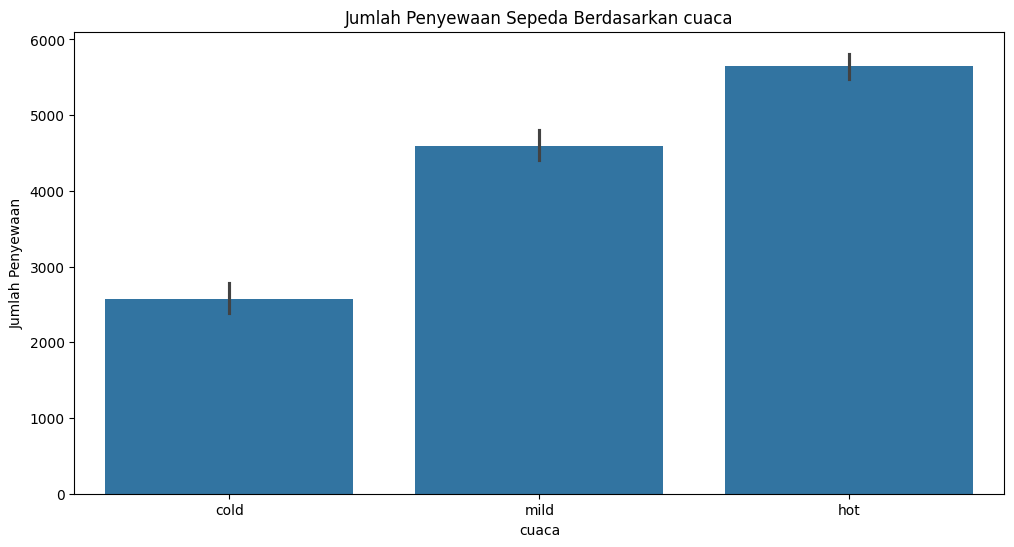

In [67]:
plt.figure(figsize=(12, 6))
sns.barplot(data= df_day, x = 'temp2_bin',y ='cnt')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan cuaca')
plt.xlabel('cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.show()

### Pertanyaan 2:

Text(0.5, 1.0, 'Jumlah Penyewaan Sepeda Berdasarkan bulan')

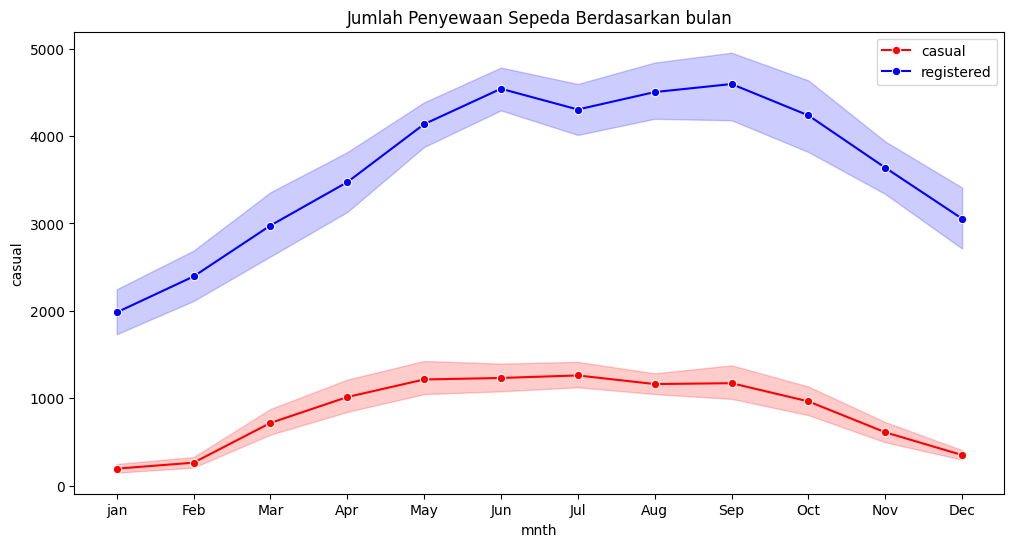

In [68]:
plt.figure(figsize=(12, 6))
sns.lineplot(data= df_day, x = 'mnth',y ='casual',marker='o',color= 'red',label='casual')
sns.lineplot(data= df_day, x = 'mnth',y ='registered',marker='o',color= 'blue',label='registered')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan bulan')

Text(0.5, 1.0, 'Jumlah Penyewaan Sepeda Berdasarkan musim')

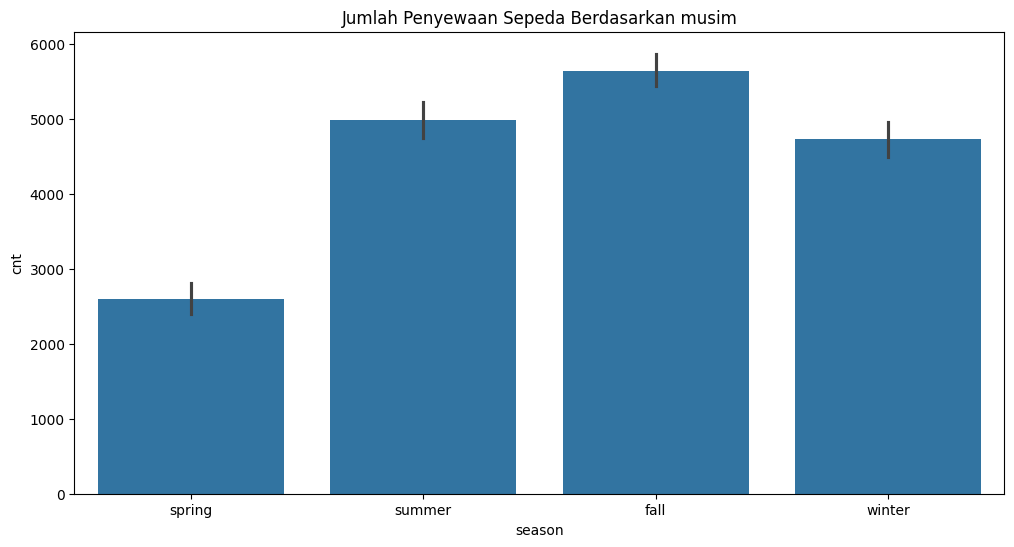

In [69]:
plt.figure(figsize=(12, 6))
sns.barplot(data= df_day, x = 'season',y ='cnt')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan musim')

**Insight:**
- The highest number of users is recorded in hot weather, followed by mild and cold. This indicates that user activity increases with higher temperatures.
- Both user groups peak in June and July, indicating the summer months are the most popular for bike rentals. This pattern aligns with the general trend that warmer weather encourages more bike usage.



## Conclusion

- Bagaimana pola penjualan sepeda bervariasi antar musim? Musim apa yang memiliki penjualan tertinggi? :
  - Penggunaan sepeda memiliki kecenderungan untuk menggunakan sepeda pada saat cuaca lebih panas atau hangat
- Bagaimana performa penjualan di bulan-bulan tertentu? Apakah ada bulan yang secara konsisten menunjukkan penjualan tinggi atau rendah?
  - pengguna sepeda mengalami peningkatan ketika bulan bulan dimana musim panas telah mulai